
 # <span style="color: green;">**Problem malarial cells detection:**</span>
 
 Classification infected or  Uninfected 

In [83]:
#importing required libraries 

import numpy as np

import cv2

import pandas as pd

from PIL import Image

from keras.models import Sequential

from keras_preprocessing.image import ImageDataGenerator, img_to_array, load_img

from keras.layers import Conv2D,Flatten,MaxPool2D,Dense,add 

import matplotlib.pyplot as plt

from skimage import io

import os

from keras.utils import to_categorical

In [55]:
# Directory of parasitized and uninfected data

Para_direct ='D:/COMPUTER VISION/Malaria Detection/cell_images/Parasitized/'
Uninfct_direct ='D:/COMPUTER VISION/Malaria Detection/cell_images/Uninfected/'

In [292]:
parasit_imges= os.listdir(Para_direct)

len(parasit_imges)

13780

In [56]:
Uninft_imges = os.listdir(Uninfct_direct)
Uninft_imges

['C100P61ThinF_IMG_20150918_144104_cell_128.png',
 'C100P61ThinF_IMG_20150918_144104_cell_131.png',
 'C100P61ThinF_IMG_20150918_144104_cell_144.png',
 'C100P61ThinF_IMG_20150918_144104_cell_21.png',
 'C100P61ThinF_IMG_20150918_144104_cell_25.png',
 'C100P61ThinF_IMG_20150918_144104_cell_34.png',
 'C100P61ThinF_IMG_20150918_144104_cell_48.png',
 'C100P61ThinF_IMG_20150918_144104_cell_65.png',
 'C100P61ThinF_IMG_20150918_144348_cell_108.png',
 'C100P61ThinF_IMG_20150918_144348_cell_120.png',
 'C100P61ThinF_IMG_20150918_144348_cell_125.png',
 'C100P61ThinF_IMG_20150918_144348_cell_131.png',
 'C100P61ThinF_IMG_20150918_144348_cell_2.png',
 'C100P61ThinF_IMG_20150918_144348_cell_25.png',
 'C100P61ThinF_IMG_20150918_144348_cell_40.png',
 'C100P61ThinF_IMG_20150918_144348_cell_71.png',
 'C100P61ThinF_IMG_20150918_144823_cell_126.png',
 'C100P61ThinF_IMG_20150918_144823_cell_127.png',
 'C100P61ThinF_IMG_20150918_144823_cell_139.png',
 'C100P61ThinF_IMG_20150918_144823_cell_142.png',
 'C100P61T

In [15]:
# Reading data

for i,image_name in enumerate(parasit_imges):
    print(image_name.split('.'))
    print('this is at 1',image_name.split('.')[0])
    print('this is at 1',image_name.split('.')[1])

['C100P61ThinF_IMG_20150918_144104_cell_162', 'png']
this is at 1 C100P61ThinF_IMG_20150918_144104_cell_162
this is at 1 png
['C100P61ThinF_IMG_20150918_144104_cell_163', 'png']
this is at 1 C100P61ThinF_IMG_20150918_144104_cell_163
this is at 1 png
['C100P61ThinF_IMG_20150918_144104_cell_164', 'png']
this is at 1 C100P61ThinF_IMG_20150918_144104_cell_164
this is at 1 png
['C100P61ThinF_IMG_20150918_144104_cell_165', 'png']
this is at 1 C100P61ThinF_IMG_20150918_144104_cell_165
this is at 1 png
['C100P61ThinF_IMG_20150918_144104_cell_166', 'png']
this is at 1 C100P61ThinF_IMG_20150918_144104_cell_166
this is at 1 png
['C100P61ThinF_IMG_20150918_144104_cell_167', 'png']
this is at 1 C100P61ThinF_IMG_20150918_144104_cell_167
this is at 1 png
['C100P61ThinF_IMG_20150918_144104_cell_168', 'png']
this is at 1 C100P61ThinF_IMG_20150918_144104_cell_168
this is at 1 png
['C100P61ThinF_IMG_20150918_144104_cell_169', 'png']
this is at 1 C100P61ThinF_IMG_20150918_144104_cell_169
this is at 1 png


this is at 1 png
['C116P77ThinF_IMG_20150930_171558_cell_119', 'png']
this is at 1 C116P77ThinF_IMG_20150930_171558_cell_119
this is at 1 png
['C116P77ThinF_IMG_20150930_171558_cell_120', 'png']
this is at 1 C116P77ThinF_IMG_20150930_171558_cell_120
this is at 1 png
['C116P77ThinF_IMG_20150930_171558_cell_121', 'png']
this is at 1 C116P77ThinF_IMG_20150930_171558_cell_121
this is at 1 png
['C116P77ThinF_IMG_20150930_171558_cell_122', 'png']
this is at 1 C116P77ThinF_IMG_20150930_171558_cell_122
this is at 1 png
['C116P77ThinF_IMG_20150930_171558_cell_123', 'png']
this is at 1 C116P77ThinF_IMG_20150930_171558_cell_123
this is at 1 png
['C116P77ThinF_IMG_20150930_171558_cell_124', 'png']
this is at 1 C116P77ThinF_IMG_20150930_171558_cell_124
this is at 1 png
['C116P77ThinF_IMG_20150930_171558_cell_125', 'png']
this is at 1 C116P77ThinF_IMG_20150930_171558_cell_125
this is at 1 png
['C116P77ThinF_IMG_20150930_171558_cell_126', 'png']
this is at 1 C116P77ThinF_IMG_20150930_171558_cell_126


this is at 1 png
['C120P81ThinF_IMG_20151002_130150_cell_198', 'png']
this is at 1 C120P81ThinF_IMG_20151002_130150_cell_198
this is at 1 png
['C120P81ThinF_IMG_20151002_130150_cell_199', 'png']
this is at 1 C120P81ThinF_IMG_20151002_130150_cell_199
this is at 1 png
['C120P81ThinF_IMG_20151002_130150_cell_200', 'png']
this is at 1 C120P81ThinF_IMG_20151002_130150_cell_200
this is at 1 png
['C120P81ThinF_IMG_20151002_130150_cell_201', 'png']
this is at 1 C120P81ThinF_IMG_20151002_130150_cell_201
this is at 1 png
['C120P81ThinF_IMG_20151002_130150_cell_202', 'png']
this is at 1 C120P81ThinF_IMG_20151002_130150_cell_202
this is at 1 png
['C120P81ThinF_IMG_20151002_130150_cell_203', 'png']
this is at 1 C120P81ThinF_IMG_20151002_130150_cell_203
this is at 1 png
['C120P81ThinF_IMG_20151002_130150_cell_204', 'png']
this is at 1 C120P81ThinF_IMG_20151002_130150_cell_204
this is at 1 png
['C120P81ThinF_IMG_20151002_130150_cell_205', 'png']
this is at 1 C120P81ThinF_IMG_20151002_130150_cell_205


this is at 1 png
['C132P93ThinF_IMG_20151004_151701_cell_136', 'png']
this is at 1 C132P93ThinF_IMG_20151004_151701_cell_136
this is at 1 png
['C132P93ThinF_IMG_20151004_151701_cell_137', 'png']
this is at 1 C132P93ThinF_IMG_20151004_151701_cell_137
this is at 1 png
['C132P93ThinF_IMG_20151004_151701_cell_138', 'png']
this is at 1 C132P93ThinF_IMG_20151004_151701_cell_138
this is at 1 png
['C132P93ThinF_IMG_20151004_151701_cell_139', 'png']
this is at 1 C132P93ThinF_IMG_20151004_151701_cell_139
this is at 1 png
['C132P93ThinF_IMG_20151004_151701_cell_140', 'png']
this is at 1 C132P93ThinF_IMG_20151004_151701_cell_140
this is at 1 png
['C132P93ThinF_IMG_20151004_151701_cell_141', 'png']
this is at 1 C132P93ThinF_IMG_20151004_151701_cell_141
this is at 1 png
['C132P93ThinF_IMG_20151004_151701_cell_142', 'png']
this is at 1 C132P93ThinF_IMG_20151004_151701_cell_142
this is at 1 png
['C132P93ThinF_IMG_20151004_151701_cell_143', 'png']
this is at 1 C132P93ThinF_IMG_20151004_151701_cell_143


['C134P95ThinF_IMG_20151005_122449_cell_134', 'png']
this is at 1 C134P95ThinF_IMG_20151005_122449_cell_134
this is at 1 png
['C134P95ThinF_IMG_20151005_122552_cell_120', 'png']
this is at 1 C134P95ThinF_IMG_20151005_122552_cell_120
this is at 1 png
['C134P95ThinF_IMG_20151005_122552_cell_121', 'png']
this is at 1 C134P95ThinF_IMG_20151005_122552_cell_121
this is at 1 png
['C134P95ThinF_IMG_20151005_122552_cell_122', 'png']
this is at 1 C134P95ThinF_IMG_20151005_122552_cell_122
this is at 1 png
['C134P95ThinF_IMG_20151005_122552_cell_123', 'png']
this is at 1 C134P95ThinF_IMG_20151005_122552_cell_123
this is at 1 png
['C134P95ThinF_IMG_20151005_122552_cell_124', 'png']
this is at 1 C134P95ThinF_IMG_20151005_122552_cell_124
this is at 1 png
['C134P95ThinF_IMG_20151005_122552_cell_125', 'png']
this is at 1 C134P95ThinF_IMG_20151005_122552_cell_125
this is at 1 png
['C135P96ThinF_IMG_20151005_123441_cell_192', 'png']
this is at 1 C135P96ThinF_IMG_20151005_123441_cell_192
this is at 1 png


this is at 1 C144P105ThinF_IMG_20151015_160908_cell_289
this is at 1 png
['C144P105ThinF_IMG_20151015_160908_cell_290', 'png']
this is at 1 C144P105ThinF_IMG_20151015_160908_cell_290
this is at 1 png
['C144P105ThinF_IMG_20151015_160908_cell_291', 'png']
this is at 1 C144P105ThinF_IMG_20151015_160908_cell_291
this is at 1 png
['C144P105ThinF_IMG_20151015_160908_cell_292', 'png']
this is at 1 C144P105ThinF_IMG_20151015_160908_cell_292
this is at 1 png
['C144P105ThinF_IMG_20151015_160908_cell_293', 'png']
this is at 1 C144P105ThinF_IMG_20151015_160908_cell_293
this is at 1 png
['C144P105ThinF_IMG_20151015_160908_cell_294', 'png']
this is at 1 C144P105ThinF_IMG_20151015_160908_cell_294
this is at 1 png
['C144P105ThinF_IMG_20151015_163142_cell_310', 'png']
this is at 1 C144P105ThinF_IMG_20151015_163142_cell_310
this is at 1 png
['C144P105ThinF_IMG_20151015_163142_cell_311', 'png']
this is at 1 C144P105ThinF_IMG_20151015_163142_cell_311
this is at 1 png
['C144P105ThinF_IMG_20151015_163142_ce

this is at 1 C174P135NThinF_IMG_20151127_135640_cell_195
this is at 1 png
['C174P135NThinF_IMG_20151127_135640_cell_196', 'png']
this is at 1 C174P135NThinF_IMG_20151127_135640_cell_196
this is at 1 png
['C174P135NThinF_IMG_20151127_135640_cell_197', 'png']
this is at 1 C174P135NThinF_IMG_20151127_135640_cell_197
this is at 1 png
['C174P135NThinF_IMG_20151127_135706_cell_1', 'png']
this is at 1 C174P135NThinF_IMG_20151127_135706_cell_1
this is at 1 png
['C175P136NThinF_IMG_20151127_141253_cell_236', 'png']
this is at 1 C175P136NThinF_IMG_20151127_141253_cell_236
this is at 1 png
['C175P136NThinF_IMG_20151127_141253_cell_237', 'png']
this is at 1 C175P136NThinF_IMG_20151127_141253_cell_237
this is at 1 png
['C175P136NThinF_IMG_20151127_141253_cell_238', 'png']
this is at 1 C175P136NThinF_IMG_20151127_141253_cell_238
this is at 1 png
['C175P136NThinF_IMG_20151127_141253_cell_239', 'png']
this is at 1 C175P136NThinF_IMG_20151127_141253_cell_239
this is at 1 png
['C175P136NThinF_IMG_201511

this is at 1 C180P141NThinF_IMG_20151201_165659_cell_45
this is at 1 png
['C180P141NThinF_IMG_20151201_165659_cell_46', 'png']
this is at 1 C180P141NThinF_IMG_20151201_165659_cell_46
this is at 1 png
['C180P141NThinF_IMG_20151201_165659_cell_47', 'png']
this is at 1 C180P141NThinF_IMG_20151201_165659_cell_47
this is at 1 png
['C180P141NThinF_IMG_20151201_165659_cell_48', 'png']
this is at 1 C180P141NThinF_IMG_20151201_165659_cell_48
this is at 1 png
['C180P141NThinF_IMG_20151201_165659_cell_5', 'png']
this is at 1 C180P141NThinF_IMG_20151201_165659_cell_5
this is at 1 png
['C180P141NThinF_IMG_20151201_165659_cell_6', 'png']
this is at 1 C180P141NThinF_IMG_20151201_165659_cell_6
this is at 1 png
['C180P141NThinF_IMG_20151201_165659_cell_7', 'png']
this is at 1 C180P141NThinF_IMG_20151201_165659_cell_7
this is at 1 png
['C180P141NThinF_IMG_20151201_165659_cell_8', 'png']
this is at 1 C180P141NThinF_IMG_20151201_165659_cell_8
this is at 1 png
['C180P141NThinF_IMG_20151201_165659_cell_9', 

['C184P145ThinF_IMG_20151203_102405_cell_143', 'png']
this is at 1 C184P145ThinF_IMG_20151203_102405_cell_143
this is at 1 png
['C184P145ThinF_IMG_20151203_102405_cell_144', 'png']
this is at 1 C184P145ThinF_IMG_20151203_102405_cell_144
this is at 1 png
['C184P145ThinF_IMG_20151203_102405_cell_145', 'png']
this is at 1 C184P145ThinF_IMG_20151203_102405_cell_145
this is at 1 png
['C184P145ThinF_IMG_20151203_102405_cell_146', 'png']
this is at 1 C184P145ThinF_IMG_20151203_102405_cell_146
this is at 1 png
['C184P145ThinF_IMG_20151203_102405_cell_147', 'png']
this is at 1 C184P145ThinF_IMG_20151203_102405_cell_147
this is at 1 png
['C184P145ThinF_IMG_20151203_102405_cell_148', 'png']
this is at 1 C184P145ThinF_IMG_20151203_102405_cell_148
this is at 1 png
['C184P145ThinF_IMG_20151203_102405_cell_149', 'png']
this is at 1 C184P145ThinF_IMG_20151203_102405_cell_149
this is at 1 png
['C184P145ThinF_IMG_20151203_102405_cell_150', 'png']
this is at 1 C184P145ThinF_IMG_20151203_102405_cell_150
t

['C33P1thinF_IMG_20150619_121229a_cell_178', 'png']
this is at 1 C33P1thinF_IMG_20150619_121229a_cell_178
this is at 1 png
['C33P1thinF_IMG_20150619_121229a_cell_179', 'png']
this is at 1 C33P1thinF_IMG_20150619_121229a_cell_179
this is at 1 png
['C33P1thinF_IMG_20150619_121300a_cell_156', 'png']
this is at 1 C33P1thinF_IMG_20150619_121300a_cell_156
this is at 1 png
['C33P1thinF_IMG_20150619_121411a_cell_189', 'png']
this is at 1 C33P1thinF_IMG_20150619_121411a_cell_189
this is at 1 png
['C33P1thinF_IMG_20150619_121411a_cell_190', 'png']
this is at 1 C33P1thinF_IMG_20150619_121411a_cell_190
this is at 1 png
['C33P1thinF_IMG_20150619_121435a_cell_173', 'png']
this is at 1 C33P1thinF_IMG_20150619_121435a_cell_173
this is at 1 png
['C33P1thinF_IMG_20150619_121503a_cell_158', 'png']
this is at 1 C33P1thinF_IMG_20150619_121503a_cell_158
this is at 1 png
['C33P1thinF_IMG_20150619_121503a_cell_159', 'png']
this is at 1 C33P1thinF_IMG_20150619_121503a_cell_159
this is at 1 png
['C37BP2_thinF_I

this is at 1 png
['C48P9thinF_IMG_20150721_160406_cell_211', 'png']
this is at 1 C48P9thinF_IMG_20150721_160406_cell_211
this is at 1 png
['C48P9thinF_IMG_20150721_160406_cell_212', 'png']
this is at 1 C48P9thinF_IMG_20150721_160406_cell_212
this is at 1 png
['C48P9thinF_IMG_20150721_160406_cell_213', 'png']
this is at 1 C48P9thinF_IMG_20150721_160406_cell_213
this is at 1 png
['C48P9thinF_IMG_20150721_160406_cell_214', 'png']
this is at 1 C48P9thinF_IMG_20150721_160406_cell_214
this is at 1 png
['C48P9thinF_IMG_20150721_160406_cell_215', 'png']
this is at 1 C48P9thinF_IMG_20150721_160406_cell_215
this is at 1 png
['C48P9thinF_IMG_20150721_160406_cell_216', 'png']
this is at 1 C48P9thinF_IMG_20150721_160406_cell_216
this is at 1 png
['C48P9thinF_IMG_20150721_160406_cell_217', 'png']
this is at 1 C48P9thinF_IMG_20150721_160406_cell_217
this is at 1 png
['C48P9thinF_IMG_20150721_160406_cell_218', 'png']
this is at 1 C48P9thinF_IMG_20150721_160406_cell_218
this is at 1 png
['C48P9thinF_IM

this is at 1 png
['C59P20thinF_IMG_20150803_113430_cell_8', 'png']
this is at 1 C59P20thinF_IMG_20150803_113430_cell_8
this is at 1 png
['C59P20thinF_IMG_20150803_113430_cell_9', 'png']
this is at 1 C59P20thinF_IMG_20150803_113430_cell_9
this is at 1 png
['C59P20thinF_IMG_20150803_113809_cell_1', 'png']
this is at 1 C59P20thinF_IMG_20150803_113809_cell_1
this is at 1 png
['C59P20thinF_IMG_20150803_113809_cell_10', 'png']
this is at 1 C59P20thinF_IMG_20150803_113809_cell_10
this is at 1 png
['C59P20thinF_IMG_20150803_113809_cell_11', 'png']
this is at 1 C59P20thinF_IMG_20150803_113809_cell_11
this is at 1 png
['C59P20thinF_IMG_20150803_113809_cell_12', 'png']
this is at 1 C59P20thinF_IMG_20150803_113809_cell_12
this is at 1 png
['C59P20thinF_IMG_20150803_113809_cell_13', 'png']
this is at 1 C59P20thinF_IMG_20150803_113809_cell_13
this is at 1 png
['C59P20thinF_IMG_20150803_113809_cell_14', 'png']
this is at 1 C59P20thinF_IMG_20150803_113809_cell_14
this is at 1 png
['C59P20thinF_IMG_201

this is at 1 png
['C68P29N_ThinF_IMG_20150819_134504_cell_144', 'png']
this is at 1 C68P29N_ThinF_IMG_20150819_134504_cell_144
this is at 1 png
['C68P29N_ThinF_IMG_20150819_134504_cell_145', 'png']
this is at 1 C68P29N_ThinF_IMG_20150819_134504_cell_145
this is at 1 png
['C68P29N_ThinF_IMG_20150819_134504_cell_146', 'png']
this is at 1 C68P29N_ThinF_IMG_20150819_134504_cell_146
this is at 1 png
['C68P29N_ThinF_IMG_20150819_134504_cell_147', 'png']
this is at 1 C68P29N_ThinF_IMG_20150819_134504_cell_147
this is at 1 png
['C68P29N_ThinF_IMG_20150819_134504_cell_148', 'png']
this is at 1 C68P29N_ThinF_IMG_20150819_134504_cell_148
this is at 1 png
['C68P29N_ThinF_IMG_20150819_134504_cell_149', 'png']
this is at 1 C68P29N_ThinF_IMG_20150819_134504_cell_149
this is at 1 png
['C68P29N_ThinF_IMG_20150819_134504_cell_150', 'png']
this is at 1 C68P29N_ThinF_IMG_20150819_134504_cell_150
this is at 1 png
['C68P29N_ThinF_IMG_20150819_134504_cell_151', 'png']
this is at 1 C68P29N_ThinF_IMG_20150819_

this is at 1 png
['C80P41ThinF_IMG_20150817_111943_cell_17', 'png']
this is at 1 C80P41ThinF_IMG_20150817_111943_cell_17
this is at 1 png
['C80P41ThinF_IMG_20150817_111943_cell_18', 'png']
this is at 1 C80P41ThinF_IMG_20150817_111943_cell_18
this is at 1 png
['C80P41ThinF_IMG_20150817_111943_cell_19', 'png']
this is at 1 C80P41ThinF_IMG_20150817_111943_cell_19
this is at 1 png
['C80P41ThinF_IMG_20150817_111943_cell_2', 'png']
this is at 1 C80P41ThinF_IMG_20150817_111943_cell_2
this is at 1 png
['C80P41ThinF_IMG_20150817_111943_cell_20', 'png']
this is at 1 C80P41ThinF_IMG_20150817_111943_cell_20
this is at 1 png
['C80P41ThinF_IMG_20150817_111943_cell_21', 'png']
this is at 1 C80P41ThinF_IMG_20150817_111943_cell_21
this is at 1 png
['C80P41ThinF_IMG_20150817_111943_cell_22', 'png']
this is at 1 C80P41ThinF_IMG_20150817_111943_cell_22
this is at 1 png
['C80P41ThinF_IMG_20150817_111943_cell_3', 'png']
this is at 1 C80P41ThinF_IMG_20150817_111943_cell_3
this is at 1 png
['C80P41ThinF_IMG_2

['C91P52ThinF_IMG_20150821_125256_cell_11', 'png']
this is at 1 C91P52ThinF_IMG_20150821_125256_cell_11
this is at 1 png
['C91P52ThinF_IMG_20150821_125256_cell_12', 'png']
this is at 1 C91P52ThinF_IMG_20150821_125256_cell_12
this is at 1 png
['C91P52ThinF_IMG_20150821_125256_cell_13', 'png']
this is at 1 C91P52ThinF_IMG_20150821_125256_cell_13
this is at 1 png
['C91P52ThinF_IMG_20150821_125256_cell_14', 'png']
this is at 1 C91P52ThinF_IMG_20150821_125256_cell_14
this is at 1 png
['C91P52ThinF_IMG_20150821_125256_cell_15', 'png']
this is at 1 C91P52ThinF_IMG_20150821_125256_cell_15
this is at 1 png
['C91P52ThinF_IMG_20150821_125256_cell_16', 'png']
this is at 1 C91P52ThinF_IMG_20150821_125256_cell_16
this is at 1 png
['C91P52ThinF_IMG_20150821_125256_cell_17', 'png']
this is at 1 C91P52ThinF_IMG_20150821_125256_cell_17
this is at 1 png
['C91P52ThinF_IMG_20150821_125256_cell_18', 'png']
this is at 1 C91P52ThinF_IMG_20150821_125256_cell_18
this is at 1 png
['C91P52ThinF_IMG_20150821_12525

this is at 1 C99P60ThinF_IMG_20150918_141857_cell_18
this is at 1 png
['C99P60ThinF_IMG_20150918_141857_cell_19', 'png']
this is at 1 C99P60ThinF_IMG_20150918_141857_cell_19
this is at 1 png
['C99P60ThinF_IMG_20150918_141857_cell_2', 'png']
this is at 1 C99P60ThinF_IMG_20150918_141857_cell_2
this is at 1 png
['C99P60ThinF_IMG_20150918_141857_cell_20', 'png']
this is at 1 C99P60ThinF_IMG_20150918_141857_cell_20
this is at 1 png
['C99P60ThinF_IMG_20150918_141857_cell_21', 'png']
this is at 1 C99P60ThinF_IMG_20150918_141857_cell_21
this is at 1 png
['C99P60ThinF_IMG_20150918_141857_cell_22', 'png']
this is at 1 C99P60ThinF_IMG_20150918_141857_cell_22
this is at 1 png
['C99P60ThinF_IMG_20150918_141857_cell_23', 'png']
this is at 1 C99P60ThinF_IMG_20150918_141857_cell_23
this is at 1 png
['C99P60ThinF_IMG_20150918_141857_cell_24', 'png']
this is at 1 C99P60ThinF_IMG_20150918_141857_cell_24
this is at 1 png
['C99P60ThinF_IMG_20150918_141857_cell_25', 'png']
this is at 1 C99P60ThinF_IMG_20150

In [58]:
dataset=[]
label=[]

In [59]:
# Reading parasitized images and create label

for i,image_name in enumerate(parasit_imges):
    if (image_name.split('.')[1]=='png'):
        image=cv2.imread(Para_direct+image_name)
        
        image= Image.fromarray(image,'RGB')
        image= image.resize((64,64))
        dataset.append(np.array(image))
        label.append(0)

In [44]:
dataset[1]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [60]:
len(dataset)

13779

In [61]:
len(dataset[1])

64

In [48]:
dataset.shape

(13779, 64, 64, 3)

In [63]:
# Reading Uninfected images and create label

for i,image_name in enumerate(Uninft_imges):
    if (image_name.split('.')[1]=='png'):
        image=cv2.imread(Uninfct_direct+image_name)
        
        image= Image.fromarray(image,'RGB')
        image= image.resize((64,64))
        dataset.append(np.array(image))
        label.append(1)

In [64]:
len(dataset)

30548

In [65]:
len(label)

30548

In [67]:
Dataset = np.array(dataset)

In [68]:
Dataset.shape

(30548, 64, 64, 3)

In [73]:
#Building  LeNet convolution neural network 

# Initializing  Sequential model 

Model= Sequential()

Model.add(Conv2D(6,kernel_size=(5,5),activation='relu', input_shape=(64,64,3)))

Model.add(MaxPool2D(pool_size=(2,2)))

Model.add(Conv2D(16, kernel_size=(5,5),activation='relu'))

Model.add(MaxPool2D(pool_size=(2,2)))

Model.add(Flatten())


Model.add(Dense(120,activation='relu'))

Model.add(Dense(84,activation='relu'))

# Final classification layer

Model.add(Dense(2, activation='softmax'))

In [101]:
# model compilation :

Model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [77]:
import sklearn
from sklearn.model_selection import train_test_split

In [84]:
# Splitting data into train and test:

X_train, X_test, y_train, y_test=  train_test_split(Dataset, to_categorical(np.array(label)), test_size= 0.2,random_state=0)


In [87]:
print('x  train',X_train.shape)
print('y  train',y_train.shape)
print('x  test',X_test.shape)
print('y  test',y_test.shape)

x  train (24438, 64, 64, 3)
y  train (24438, 2)
x  test (6110, 64, 64, 3)
y  test (6110, 2)


In [116]:
# Creating checkpoint, earlyStopping and csvLogger  to monitor model 

from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger

filepath ='Savedmodel/Weighted-improved.hdf5'

checkpoint = ModelCheckpoint(filepath,monitor='val_acc',verbose=1,save_best_only=True, mode='max')

earlystop = EarlyStopping(monitor='val_loss',patience=10,verbose=1)

log_csv = CSVLogger('log_LeNet_csv',separator=',', append=False)

callback_list = [checkpoint,log_csv]

In [117]:
Result= Model.fit(X_train,y_train,epochs=300,batch_size=32,verbose=1,validation_data=(X_test,y_test),callbacks=callback_list )

Train on 24438 samples, validate on 6110 samples
Epoch 1/300
24438/24438 [==============================] - 4s 168us/step - loss: 0.1713 - accuracy: 0.8997 - val_loss: 0.8062 - val_accuracy: 0.7910
Epoch 2/300
24438/24438 [==============================] - 4s 167us/step - loss: 0.1769 - accuracy: 0.9002 - val_loss: 0.8641 - val_accuracy: 0.8098
Epoch 3/300
24438/24438 [==============================] - 4s 168us/step - loss: 0.1729 - accuracy: 0.9001 - val_loss: 0.8416 - val_accuracy: 0.8038
Epoch 4/300
24438/24438 [==============================] - 4s 167us/step - loss: 0.1667 - accuracy: 0.9029 - val_loss: 0.9658 - val_accuracy: 0.8118
Epoch 5/300
24438/24438 [==============================] - 4s 166us/step - loss: 0.1582 - accuracy: 0.9032 - val_loss: 0.9345 - val_accuracy: 0.7902
Epoch 6/300
24438/24438 [==============================] - 4s 167us/step - loss: 0.1689 - accuracy: 0.9003 - val_loss: 1.0292 - val_accuracy: 0.8000
Epoch 7/300
24438/24438 [==============================] 

24438/24438 [==============================] - 4s 167us/step - loss: 0.1609 - accuracy: 0.9118 - val_loss: 4.1713 - val_accuracy: 0.7404
Epoch 110/300
24438/24438 [==============================] - 4s 167us/step - loss: 0.1496 - accuracy: 0.9134 - val_loss: 1.7139 - val_accuracy: 0.7270
Epoch 111/300
24438/24438 [==============================] - 4s 168us/step - loss: 0.1413 - accuracy: 0.9128 - val_loss: 2.2951 - val_accuracy: 0.7313
Epoch 112/300
24438/24438 [==============================] - 4s 167us/step - loss: 0.1454 - accuracy: 0.9097 - val_loss: 2.4716 - val_accuracy: 0.7249
Epoch 113/300
24438/24438 [==============================] - 4s 168us/step - loss: 0.1263 - accuracy: 0.9175 - val_loss: 2.3906 - val_accuracy: 0.7349
Epoch 114/300
24438/24438 [==============================] - 4s 167us/step - loss: 0.1206 - accuracy: 0.9184 - val_loss: 2.7896 - val_accuracy: 0.7347
Epoch 115/300
24438/24438 [==============================] - 4s 167us/step - loss: 0.1215 - accuracy: 0.9185

24438/24438 [==============================] - 4s 167us/step - loss: 0.1284 - accuracy: 0.9161 - val_loss: 2.4982 - val_accuracy: 0.7061
Epoch 218/300
24438/24438 [==============================] - 4s 167us/step - loss: 0.1589 - accuracy: 0.9088 - val_loss: 2.4075 - val_accuracy: 0.7272
Epoch 219/300
24438/24438 [==============================] - 4s 167us/step - loss: 0.1203 - accuracy: 0.9184 - val_loss: 4.8814 - val_accuracy: 0.7314
Epoch 220/300
24438/24438 [==============================] - 4s 167us/step - loss: 0.1272 - accuracy: 0.9182 - val_loss: 2.9186 - val_accuracy: 0.7232
Epoch 221/300
24438/24438 [==============================] - 4s 167us/step - loss: 0.1295 - accuracy: 0.9172 - val_loss: 2.6388 - val_accuracy: 0.7172
Epoch 222/300
24438/24438 [==============================] - 4s 167us/step - loss: 0.1295 - accuracy: 0.9163 - val_loss: 4.5610 - val_accuracy: 0.7324
Epoch 223/300
24438/24438 [==============================] - 4s 167us/step - loss: 0.1298 - accuracy: 0.9158

In [118]:
Model.save('LetNetmodel.h5')

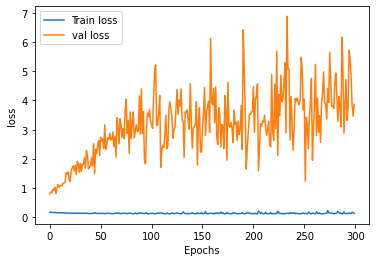

<Figure size 432x288 with 0 Axes>

In [119]:

plt.plot(Model.history.history['loss'],label='Train loss')
plt.plot(Model.history.history['val_loss'],label='val loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.savefig('loss_Val_loss')

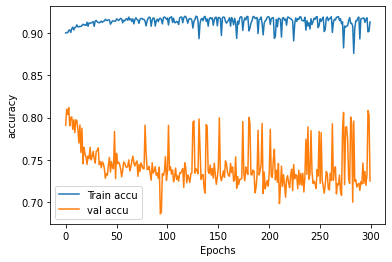

<Figure size 432x288 with 0 Axes>

In [121]:

plt.plot(Model.history.history['accuracy'],label='Train accu')
plt.plot(Model.history.history['val_accuracy'],label='val accu')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.savefig('Accu_Val_acuu')

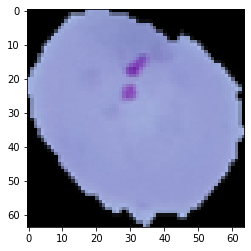

In [132]:
img5=Dataset[5]

plt.imshow(img5)

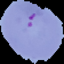

In [128]:
Image.fromarray(img5)

# The onehot encoding of label :

  <span style="color: red;">**Parasitezed label 0  repective onehot encoding is [1,0]:**</span>
  
  >so, predict[0][0] =1  = parasitezed
  
  <span style="color: green;">**Uninfected label 1  repective onehot encoding is [0,1:**</span>
  
  >so, predict[0][0] =0  = Uninfected
  
    

* argmax: Return indices of the maximum values along the given axis.

predict = will return probability value for both class 

And performing argmax on it will give  indice of max probability class value

In [268]:
# taking 30540 th image value

img5=Dataset[30540]

# Expanding dim (batch,width,height,no channel)

img_dim= np.expand_dims(img5, axis=0)

# prediction on 30540th image 

predict=Model.predict(img_dim)

print('Prediction probabilies for both class',predict)

print('predict.Argmax(axis=1) gives indices of prediction of maximum probability', predict.argmax(axis=1))

Prediction probabilies for both class [[6.530525e-08 9.999999e-01]]
predict.Argmax(axis=1) gives indices of prediction of maximum probability [1]


In [260]:
img5=Dataset[2]
img_dim= np.expand_dims(img5, axis=0)
predict=Model.predict(img_dim)

if (predict.argmax(axis=1)==0):
    print('Parasitized')
else:
        print('Uninfected')


Parasitized


In [263]:
img5=Dataset[10]
img_dim= np.expand_dims(img5, axis=0)
predict=Model.predict(img_dim)

if (predict.argmax(axis=1)==0):
    print('Parasitized')
else:
        print('Uninfected')

Parasitized


In [ ]:
predict.argmax

In [261]:
img5=Dataset[30540]
img_dim= np.expand_dims(img5, axis=0)

predict=Model.predict(img_dim)
if (predict.argmax(axis=1)==0):
    print('Parasitized')
else:
        print('Uninfected')

Uninfected


In [262]:
img5=Dataset[30440]
img_dim= np.expand_dims(img5, axis=0)

predict=Model.predict(img_dim)
if (predict.argmax(axis=1)==0):
    print('Parasitized')
else:
        print('Uninfected')

Uninfected


In [252]:
predict.argmax(axis=1)

array([1], dtype=int64)

# Model evaluation

In [251]:
_, acc = Model.evaluate(X_test,y_test)
print("Accuracy=",(acc * 100.0), "%")

6110/6110 [==============================] - 1s 148us/step
Accuracy= 72.5204586982727 %


# Plotting confusion matrix

In [215]:
from sklearn.metrics import confusion_matrix

In [233]:
y_pred= (Model.predict(X_test))

In [243]:
y_pred[1]

array([4.1606913e-09, 1.0000000e+00], dtype=float32)

In [239]:
y_pred[1][0]+y_pred[1][1]

1.0

In [248]:
## argmax: Return indices of the maximum values along the given axis.
y_test.argmax(axis=1)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [228]:

conf_matrix =confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [229]:
conf_matrix

array([[3152,  197],
       [1875,  886]], dtype=int64)

In [269]:
from sklearn.metrics import roc_curve, auc

In [278]:
y_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [280]:
y_pred[1:10]

array([[4.1606913e-09, 1.0000000e+00],
       [9.3595147e-01, 6.4048596e-02],
       [8.5906308e-05, 9.9991405e-01],
       [1.4656190e-09, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [8.6603500e-03, 9.9133962e-01],
       [2.9065675e-11, 1.0000000e+00],
       [1.0000000e+00, 1.7665845e-26],
       [9.9930441e-01, 6.9557736e-04]], dtype=float32)

In [281]:
Model.predict(X_test).ravel()

array([1.0000000e+00, 0.0000000e+00, 4.1606913e-09, ..., 6.5038673e-14,
       1.0000000e+00, 0.0000000e+00], dtype=float32)

In [282]:
Model.predict(X_test)

array([[1.0000000e+00, 0.0000000e+00],
       [4.1606913e-09, 1.0000000e+00],
       [9.3595147e-01, 6.4048596e-02],
       ...,
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 6.5038673e-14],
       [1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [286]:
sklearn.__version__

'0.23.2'

In [289]:
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y.argmax(axis=1), pred.argmax(axis=1))
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

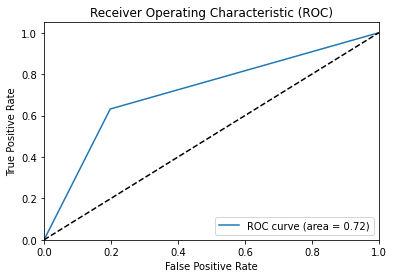

In [290]:
plot_roc(y_pred,y_test)